# **Task 2**

Perform data cleaning and exploratory data analysis (EDA) on a
Titanic dataset. Explore the relationships between variables and identify patterns and trends in the data.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Handling missing values: fill age with median, and drop rows with missing 'Embarked'
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [10]:
# Drop the 'Cabin' column since it has too many missing values
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

In [11]:

# Check the data types of the columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None


In [12]:
# Convert 'Pclass' to categorical for better EDA visualization
df['Pclass'] = df['Pclass'].astype('category')

In [16]:
# Set plot styles for better visuals
sns.set(style="whitegrid")

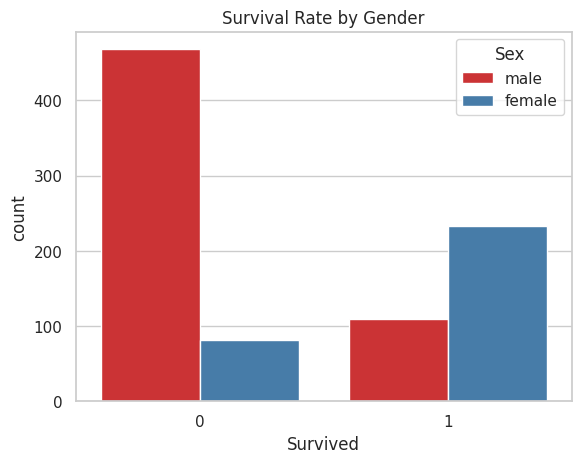

In [17]:
# Survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()

<ipython-input-30-49be1690458b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')


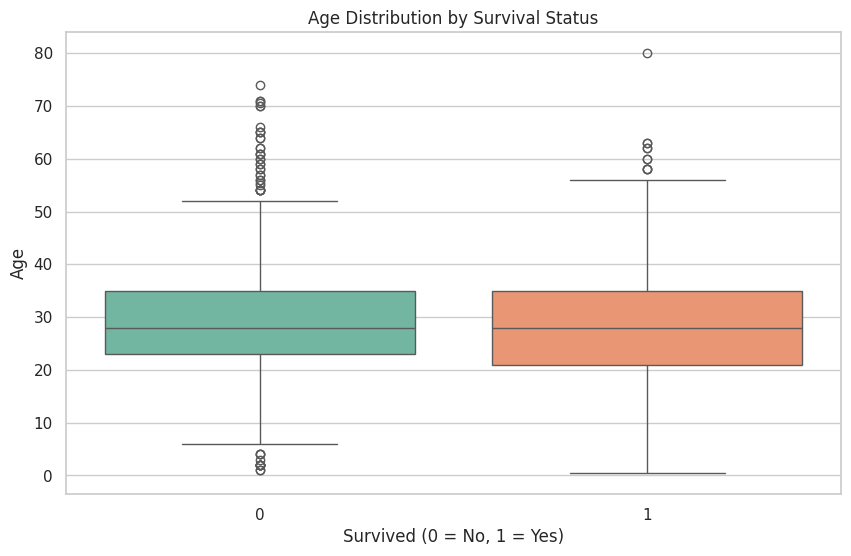

In [30]:
# Box plot for Age distribution by Survival status
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


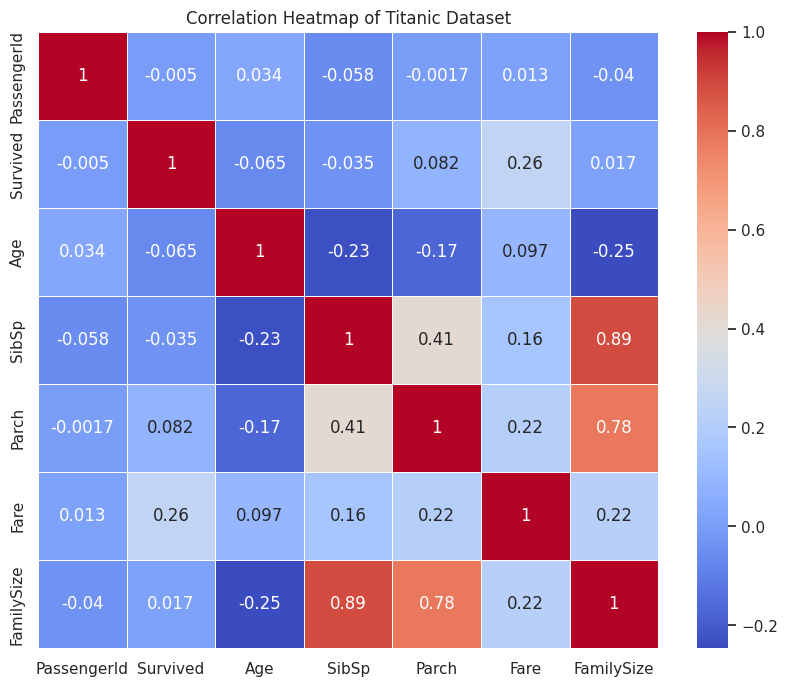

In [33]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()


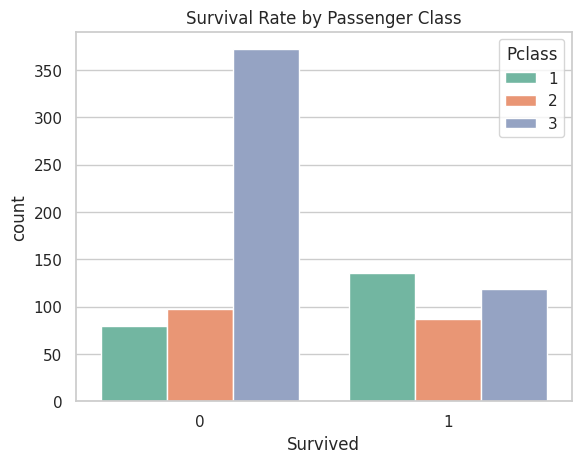

In [18]:
# Survival rate by passenger class
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2')
plt.title('Survival status by Passenger Class')
plt.show()

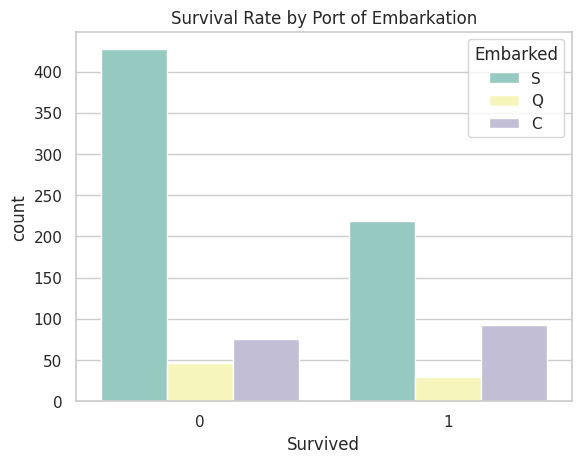

In [22]:
# Survival rate by embarkation port
sns.countplot(x='Survived', hue='Embarked', data=df, palette='Set3')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

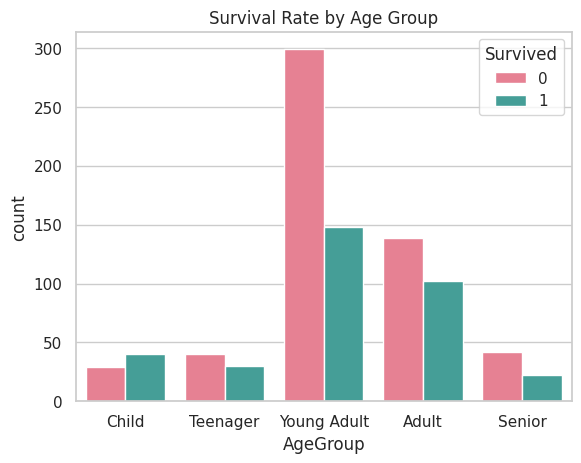

In [25]:
# Create age bins
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot survival by age group
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='husl')
plt.title('Survival Rate by Age Group')
plt.show()
